### SAAMA Interview  Coding Assignment

#### Name :  Jothika R
#### Mail : jothika.r20@gmail.com

#### Dataset Description:-
You are given a dataset containing information about a company's sales transactions. Your task is to perform 
Exploratory Data Analysis (EDA) on this dataset to gain insights into the company's sales performance and customer 
behavior.

#### Import the Required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

#### Data Collection and Data Preparation

In [2]:
# Load datasets into dataframes
customer_df = pd.read_csv("customer_mod.csv")
product_df = pd.read_csv("product.csv")
transaction_df = pd.read_csv("transactions.csv")

#### Data Selection for Analysis in Customer, Product, and Transaction Datasets

In [3]:
# Select columns from customer dataframe
selected_customer_columns = customer_df[['customer_id', 'first_name', 'last_name', 'gender', 'birthdate',  'home_country', 'first_join_date']]

# Select columns from product dataframe
selected_product_columns = product_df[['id','articleType', 'baseColour', 'season', 'year', 'productDisplayName']]

# Select columns from transaction dataframe
selected_transaction_columns = transaction_df[['created_at', 'customer_id', 'booking_id','product_metadata', 'payment_method', 'payment_status', 'total_amount']]


#### Merging Customer and Transaction Data Based on IDs

The selected customer and transaction datasets are merged using an inner join on the customer_id column. This merge operation combines relevant customer information with transaction details, facilitating deeper analysis of customer behavior and transaction patterns.

In [4]:
# Merge selected dataframes based on customer_id and product_id
merged_df = pd.merge(selected_customer_columns, selected_transaction_columns, on='customer_id', how='inner')


In [5]:
merged_df

,customer_id,first_name,last_name,gender,birthdate,home_country,first_join_date,created_at,booking_id,product_metadata,payment_method,payment_status,total_amount
0,22594,Dina,Usada,F,1991-05-28,Indonesia,2022-06-11,2022-06-13T03:16:10.877475Z,317c6c0e-710f-490d-b566-843de918434b,"[{'product_id': 5481, 'quantity': 1, 'item_pri...",OVO,Success,315193
1,22594,Dina,Usada,F,1991-05-28,Indonesia,2022-06-11,2022-06-25T08:54:26.877475Z,82da6a05-8c6d-43ef-aa3d-bb24633a11bf,"[{'product_id': 21548, 'quantity': 1, 'item_pr...",Credit Card,Success,257447
2,22594,Dina,Usada,F,1991-05-28,Indonesia,2022-06-11,2022-07-07T14:36:27.877475Z,a7d6d1d8-7e8b-465e-a44a-c96b66dcbc0e,"[{'product_id': 58258, 'quantity': 1, 'item_pr...",Credit Card,Success,271821
3,22594,Dina,Usada,F,1991-05-28,Indonesia,2022-06-11,2022-07-19T20:42:12.877475Z,25a8db70-940c-4ef5-af66-c3bac86e76f7,"[{'product_id': 26691, 'quantity': 1, 'item_pr...",Credit Card,Success,167076
4,47463,Jarwa,Napitupulu,M,1992-10-31,Indonesia,2018-10-21,2018-10-22T03:33:46.249684Z,cc45cb30-502d-4c86-8382-ac41a6a0f2d0,"[{'product_id': 45354, 'quantity': 1, 'item_pr...",OVO,Success,226295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15304,39152,Titi,Mandasari,F,1990-01-25,Indonesia,2019-08-14,2022-04-28T03:30:02.352927Z,4da4c2a2-27e6-4dc4-a675-aa09a0f84772,"[{'product_id': 48698, 'quantity': 1, 'item_pr...",OVO,Success,177261
15305,39152,Titi,Mandasari,F,1990-01-25,Indonesia,2019-08-14,2022-05-19T04:30:52.352927Z,6d0b16fe-8d0e-41d5-94bc-739969b30a51,"[{'product_id': 29322, 'quantity': 1, 'item_pr...",Credit Card,Success,213377
15306,39152,Titi,Mandasari,F,1990-01-25,Indonesia,2019-08-14,2022-06-09T04:55:10.352927Z,4be53c14-137f-4a9e-8056-d4bc9f3ce71e,"[{'product_id': 2893, 'quantity': 1, 'item_pri...",Credit Card,Success,290433
15307,39152,Titi,Mandasari,F,1990-01-25,Indonesia,2019-08-14,2022-06-30T04:56:33.352927Z,9bf90b61-d87a-405a-9181-0afb100ef1ae,"[{'product_id': 47019, 'quantity': 2, 'item_pr...",Credit Card,Success,221980


#### Processing Product Metadata in Merged Data

The string representation of product metadata in the merged dataset is converted back to a list of dictionaries. Subsequently, the metadata is split into separate columns for product_id, quantity, and item_price, aiding in better analysis of individual product details within transactions. The original product_metadata column is then dropped from the dataset, streamlining data structure for further exploration and insights.


In [6]:
# Convert string representation of list of dictionaries back to list of dictionaries
merged_df['product_metadata'] = merged_df['product_metadata'].apply(ast.literal_eval)

# Splitting product metadata into separate columns
merged_df[['product_id', 'quantity', 'item_price']] = merged_df['product_metadata'].apply(lambda x: pd.Series([x[0]['product_id'], x[0]['quantity'], x[0]['item_price']]))

# Drop the original product_metadata column
merged_df.drop(columns=['product_metadata'], inplace=True)

In [7]:
merged_df.head(2)

,customer_id,first_name,last_name,gender,birthdate,home_country,first_join_date,created_at,booking_id,payment_method,payment_status,total_amount,product_id,quantity,item_price
0,22594,Dina,Usada,F,1991-05-28,Indonesia,2022-06-11,2022-06-13T03:16:10.877475Z,317c6c0e-710f-490d-b566-843de918434b,OVO,Success,315193,5481,1,315193
1,22594,Dina,Usada,F,1991-05-28,Indonesia,2022-06-11,2022-06-25T08:54:26.877475Z,82da6a05-8c6d-43ef-aa3d-bb24633a11bf,Credit Card,Success,257447,21548,1,242447


In [8]:
# Create a copy of the DataFrame
selected_product_columns_copy = selected_product_columns.copy()

# Rename columns in the copied DataFrame
selected_product_columns_copy.rename(columns={'id': 'product_id'}, inplace=True)



In [9]:
# Merge selected dataframes based on customer_id and product_id
final_merged_df = pd.merge(merged_df, selected_product_columns_copy, on='product_id', how='inner')
final_merged_df.head(2)

,customer_id,first_name,last_name,gender,birthdate,home_country,first_join_date,created_at,booking_id,payment_method,payment_status,total_amount,product_id,quantity,item_price,articleType,baseColour,season,year,productDisplayName
0,22594,Dina,Usada,F,1991-05-28,Indonesia,2022-06-11,2022-06-13T03:16:10.877475Z,317c6c0e-710f-490d-b566-843de918434b,OVO,Success,315193,5481,1,315193,Sports Shoes,Blue,Summer,2011.0,Nike Men Air Courtballistec Blue Shoe
1,21882,Shania,Halimah,F,1999-07-28,Indonesia,2021-02-09,2021-03-16T01:34:19.925350Z,02f0983d-487e-4c4d-adbc-94ec5a2fb8b0,Credit Card,Success,800370,5481,2,395185,Sports Shoes,Blue,Summer,2011.0,Nike Men Air Courtballistec Blue Shoe


#### Reorder the columns for better analysis and understanding

In [10]:
# Reorder the columns
final_merged_df = final_merged_df[['customer_id', 'first_name', 'last_name', 'gender', 'birthdate', 'home_country', 'first_join_date',
                                   'product_id','quantity','item_price' ,'booking_id', 'year', 'productDisplayName',
                                   'created_at', 'payment_method', 'payment_status', 'total_amount']]

# Display the DataFrame with rearranged columns
final_merged_df.head(2)

,customer_id,first_name,last_name,gender,birthdate,home_country,first_join_date,product_id,quantity,item_price,booking_id,year,productDisplayName,created_at,payment_method,payment_status,total_amount
0,22594,Dina,Usada,F,1991-05-28,Indonesia,2022-06-11,5481,1,315193,317c6c0e-710f-490d-b566-843de918434b,2011.0,Nike Men Air Courtballistec Blue Shoe,2022-06-13T03:16:10.877475Z,OVO,Success,315193
1,21882,Shania,Halimah,F,1999-07-28,Indonesia,2021-02-09,5481,2,395185,02f0983d-487e-4c4d-adbc-94ec5a2fb8b0,2011.0,Nike Men Air Courtballistec Blue Shoe,2021-03-16T01:34:19.925350Z,Credit Card,Success,800370


#### Data Preprocessing

The final merged dataset contains 15,309 entries with 17 columns, showcasing comprehensive customer and transactional details. The dataset primarily comprises integer and object data types, facilitating detailed analysis of customer behavior and transaction patterns.

In [11]:
print("Shape of the dataset:",final_merged_df.shape)

Shape of the dataset: (15309, 17)


In [12]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15309 entries, 0 to 15308
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         15309 non-null  int64  
 1   first_name          15309 non-null  object 
 2   last_name           15309 non-null  object 
 3   gender              15309 non-null  object 
 4   birthdate           15309 non-null  object 
 5   home_country        15309 non-null  object 
 6   first_join_date     15309 non-null  object 
 7   product_id          15309 non-null  int64  
 8   quantity            15309 non-null  int64  
 9   item_price          15309 non-null  int64  
 10  booking_id          15309 non-null  object 
 11  year                15309 non-null  float64
 12  productDisplayName  15308 non-null  object 
 13  created_at          15309 non-null  object 
 14  payment_method      15309 non-null  object 
 15  payment_status      15309 non-null  object 
 16  tota

In [13]:
final_merged_df.describe()

,customer_id,product_id,quantity,item_price,year,total_amount
count,15309.000000,15309.000000,15309.000000,15309.000000,15309.000000,1.530900e+04
mean,49982.955255,29660.968123,1.491018,248839.347965,2012.797831,5.404997e+05
std,29487.111703,17022.936486,1.662896,111731.402758,2.121125,7.925342e+05
min,107.000000,1163.000000,1.000000,25763.000000,2007.000000,3.076300e+04
25%,25532.000000,14758.000000,1.000000,166797.000000,2011.000000,2.025800e+05
50%,49039.000000,28532.000000,1.000000,233332.000000,2012.000000,2.982800e+05
75%,76457.000000,44674.000000,1.000000,310875.000000,2015.000000,5.055090e+05
max,99942.000000,59999.000000,32.000000,936549.000000,2019.000000,1.221437e+07


#### 1. Analyse transaction amounts (Total Price) distribution using summary statistics and visualizations.

In [14]:
# Summary statistics
summary_stats = final_merged_df['total_amount'].describe()
print("Summary Statistics for Total Amount:")
print(summary_stats)

Summary Statistics for Total Amount:
count    1.530900e+04
mean     5.404997e+05
std      7.925342e+05
min      3.076300e+04
25%      2.025800e+05
50%      2.982800e+05
75%      5.055090e+05
max      1.221437e+07
Name: total_amount, dtype: float64


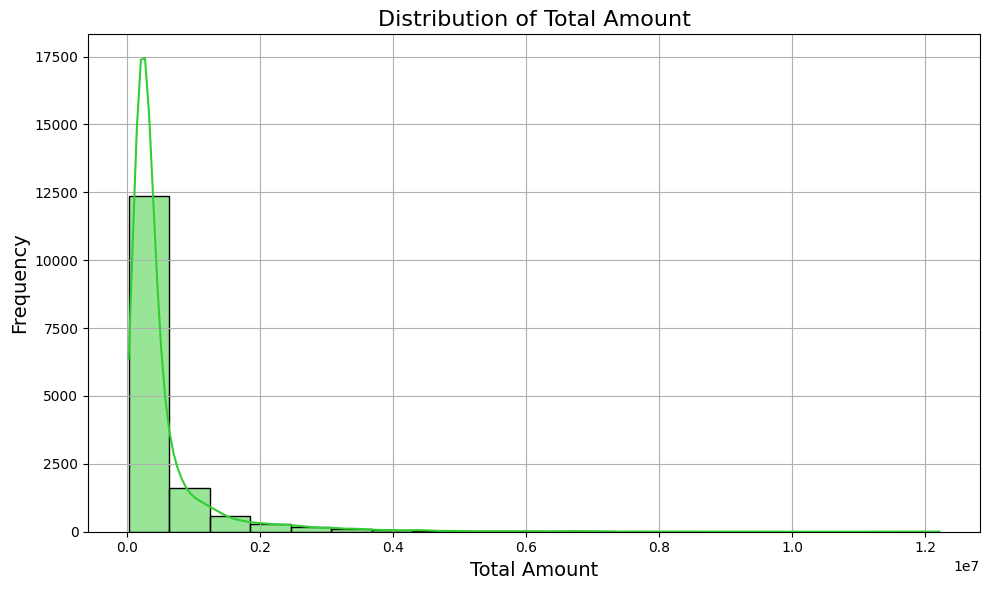

In [15]:
# Create a histogram for the visualization
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_df['total_amount'], bins=20, kde=True, color='limegreen')
plt.title('Distribution of Total Amount', fontsize=16)
plt.xlabel('Total Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Result: 

The total amount in transactions ranges from 30,763 to 12,214,370, with an average transaction amount of approximately 540,500. The median transaction amount is around 298,280, indicating a slightly right-skewed distribution. These statistics provide insights into the spread and central tendency of transaction amounts.

 #### 2. Investigate the relationship between transaction quantities and unit prices using appropriate visualizations

In [16]:
# Convert 'item_price' to numeric in case it's stored as string
final_merged_df['item_price'] = pd.to_numeric(final_merged_df['item_price'])

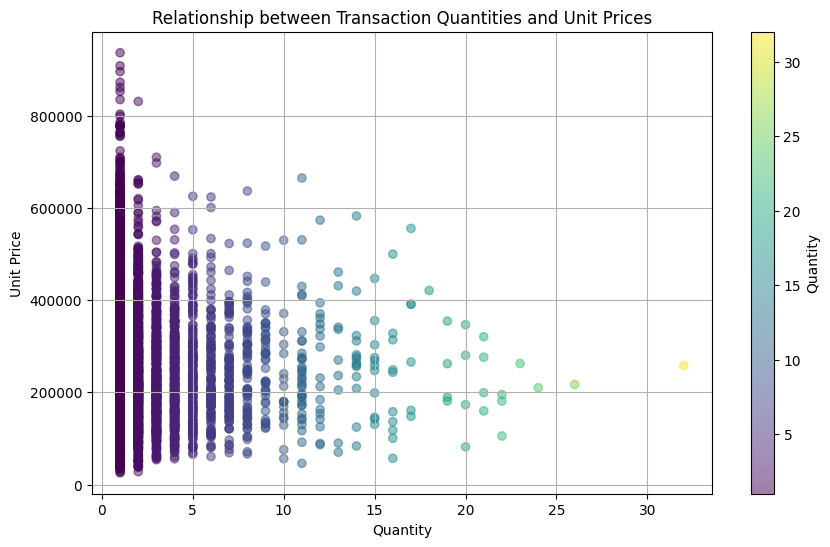

In [17]:
# Plotting the relationship between transaction quantities and unit prices with a multicolor scheme
plt.figure(figsize=(10, 6))
plt.scatter(final_merged_df['quantity'], final_merged_df['item_price'], alpha=0.5, c=final_merged_df['quantity'], cmap='viridis')
plt.title('Relationship between Transaction Quantities and Unit Prices')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.colorbar(label='Quantity')  # Adding a colorbar to show the scale
plt.grid(True)
plt.show()

In [18]:
## calculate and visualize the correlation coefficient between these two variables to quantify the relationship:
correlation_coefficient = final_merged_df['quantity'].corr(final_merged_df['item_price'])
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: -0.005638226541022035


The correlation coefficient, approximately -0.0056, indicates a minor negative link between transaction quantities and unit prices, suggesting a slight decrease in prices with increasing transactions. However, the weak correlation implies little linear relationship, implying other factors may drive price variations independently of transaction quantities.

#### 3.  Explore the distribution of sales transactions by product and identify the top-selling products

In [19]:
# Grouping by product_id and summing up the quantity sold for each product
product_sales = final_merged_df.groupby('product_id').agg({'quantity': 'sum', 'productDisplayName': 'first'})


In [20]:
# Sorting the products based on total quantity sold in descending order
top_selling_products = product_sales.sort_values(by='quantity', ascending=False)


In [21]:
# Displaying the top-selling products
print("Top Selling Products:")
print(top_selling_products.head(10))  # You can adjust the number to show more or fewer products

Top Selling Products:
            quantity                                productDisplayName
product_id                                                            
12601             32                 Tantra Unisex Printed Red Tshirts
14637             26            Probase Men Classic Check White Shirts
51876             25                 U.S. Polo Assn. Men Black Sandals
2689              24       Inkfruit Women Happy Dolphin Purple T-shirt
51501             22                          Denizen Women Blue Jeans
50173             22              Rocia Women Multi Coloured Ballerina
6076              22  UCB Men's Polo Neck Striper White Yellow T-shirt
16208             22        Puma Men Cheveron Wording Black SweatShirt
50526             21                   Chromozome Men Pack of 2 Briefs
31930             21                  Fabindia Women Black Silk Clutch


These are the top-selling products along with their respective quantities. This summary provides insight into the highest selling products and their popularity based on sales volume.

#### 4. Analyse customer behavior by examining the distribution of transaction counts per customer and identifying the most frequent customers

In [22]:
#Group by customer_id and count transactions
transaction_counts = final_merged_df.groupby('customer_id').size()

#Sort customers by transaction counts in descending order
sorted_customers = transaction_counts.sort_values(ascending=False)


In [23]:
#Get the most frequent customers
most_frequent_customers = sorted_customers.head(10)  # Assuming you want the top 10 customers


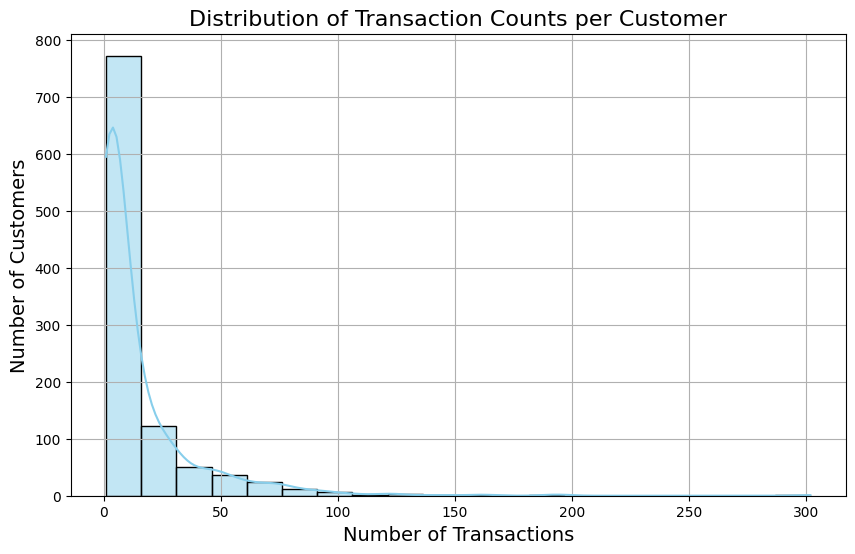

In [24]:
# Visualize the distribution of transaction counts per customer
plt.figure(figsize=(10, 6))
sns.histplot(transaction_counts, bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Transaction Counts per Customer', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(True)
plt.show()

In [25]:
# Print the most frequent customers
print("Top 10 Most Frequent Customers:")
print(most_frequent_customers)

Top 10 Most Frequent Customers:
customer_id
5816     302
28434    195
50788    192
42285    164
40518    158
81376    142
56319    127
23885    123
94499    122
46070    117
dtype: int64


These are the top 10 most frequent customers based on transaction counts. The distribution of transaction counts per customer is visualized in the histogram plot above.

#### 5. Calculate summary statistics for relevant variables (e.g., total sales revenue, average transaction size) to understand the company's sales performance better.


In [26]:
# Total sales revenue
total_sales_revenue = final_merged_df['total_amount'].sum()

# Average transaction size
average_transaction_size = final_merged_df['total_amount'].mean()

# Number of transactions
num_transactions = final_merged_df.shape[0]

# Average quantity per transaction
average_quantity_per_transaction = final_merged_df['quantity'].mean()

# Number of unique customers
num_unique_customers = final_merged_df['customer_id'].nunique()

# Number of unique products sold
num_unique_products_sold = final_merged_df['product_id'].nunique()


In [27]:
# Summary statistics
summary_statistics = {
    'Total Sales Revenue': total_sales_revenue,
    'Average Transaction Size': average_transaction_size,
    'Number of Transactions': num_transactions,
    'Average Quantity per Transaction': average_quantity_per_transaction,
    'Number of Unique Customers': num_unique_customers,
    'Number of Unique Products Sold': num_unique_products_sold
}

In [28]:
# Display summary statistics
print("Summary Statistics:")
for key, value in summary_statistics.items():
    print(f"{key}: {value}")

Summary Statistics:
Total Sales Revenue: 8274509489
Average Transaction Size: 540499.6726762035
Number of Transactions: 15309
Average Quantity per Transaction: 1.491018355215886
Number of Unique Customers: 1035
Number of Unique Products Sold: 12995


The summary statistics reveal a robust sales performance: total revenue stands impressively at 8.27 billion, with an average transaction size of around 540,500. Over 15,000 transactions were processed, indicating a steady flow of business. The average quantity per transaction is approximately 1.49 units, showcasing consistent customer engagement. Moreover, with 1,035 unique customers and nearly 13,000 distinct products sold, the business demonstrates both breadth and depth in its market reach and product offering

#### 6. Summarize your findings and provide recommendations for the company based on your analysis
The analysis highlights strong sales performance for the company, with substantial revenue and a steady flow of transactions. To capitalize on this success and further enhance growth, the company could focus on strategies like personalized marketing to retain existing customers and attract new ones. Additionally, optimizing inventory management to ensure popular products are always available can help maximize sales opportunities.


#### 7. Additional Insights
#### Analyze Payment Methods Distribution
 Explore the distribution of payment methods used by customers. Identify the most preferred payment methods

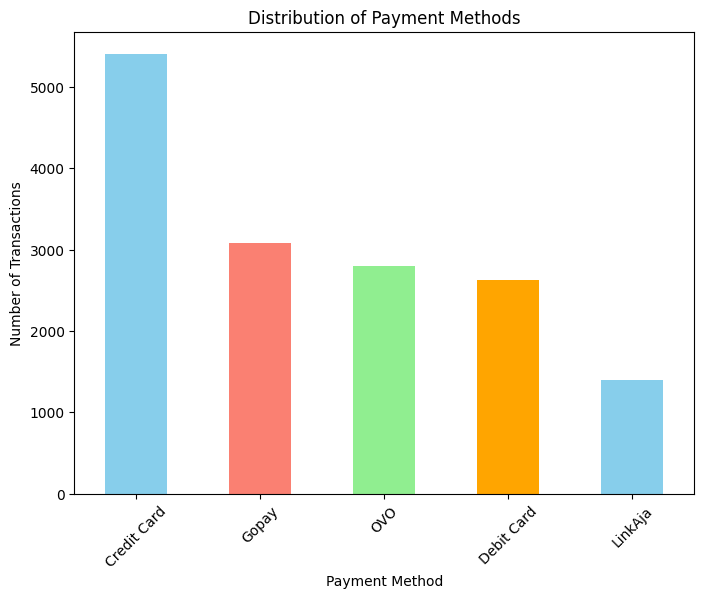

In [29]:
# Grouping by payment method and counting occurrences
payment_counts = final_merged_df['payment_method'].value_counts()

# Defining colors for the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Plotting payment method distribution
plt.figure(figsize=(8, 6))
payment_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


#### Summary of Seasonal Sales Trends

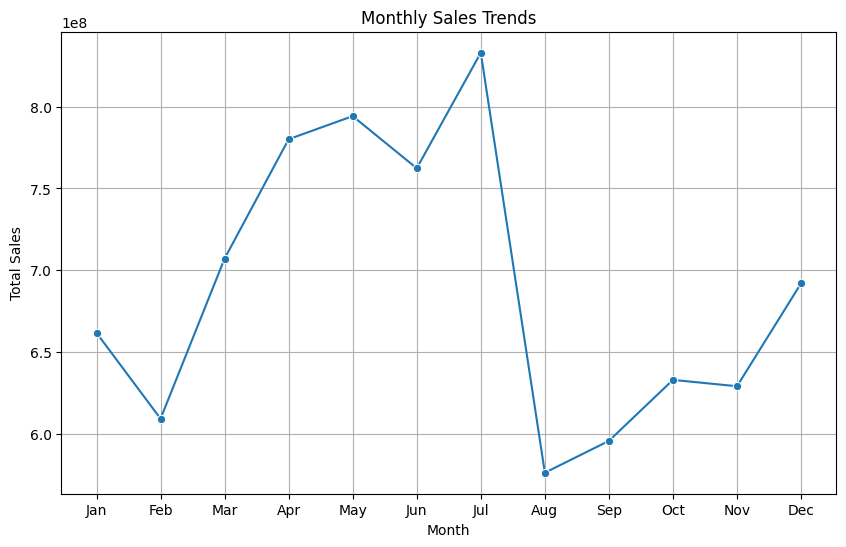

In [30]:
# Convert 'created_at' column to datetime
final_merged_df['created_at'] = pd.to_datetime(final_merged_df['created_at'])

# Extract month from the 'created_at' column
final_merged_df['month'] = final_merged_df['created_at'].dt.month

# Grouping by month and calculating total sales
monthly_sales = final_merged_df.groupby('month')['total_amount'].sum()

# Plotting monthly sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

#### Result:

July Sales Peak:
    July stood out with a significant sales peak, indicating robust consumer spending and market activity.
    
August Sales Dip:
    August witnessed a notable decline in sales compared to July, suggesting a temporary downturn in consumer demand.
    
#### Recommendations:

Maximize July Opportunities: 
    Leverage July's sales momentum with targeted promotions and new product launches to further drive revenue.
    
Mitigate August Slump:
    Implement strategies like end-of-summer sales or special promotions to the August sales  and maintain customer engagement.